In [2]:
import pandas as pd
import numpy as np
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from fbprophet import Prophet

In [ ]:
# conda install -c conda-forge fbprophet

In [ ]:
# conda install gcc

### Facebook Profit Analysis 

Using Facebook profit for time series predictions.  This data is hourly over 1 year compared to the Arima EDA notebook I expect this model will be much more accurate. Profit is good for daily, weekly, yearly and holiday trends. I will start off with some EDA since this new Data Set has hourly data 

In [4]:
# A look at the power Date Frame 
power = pd.read_csv('power.csv')
power.head()


,Date,powera,powerb,powertotal
0,2018-11-14 14:17:00,541105.875,1039355.750,1580461.625
1,2018-11-14 15:17:00,1002934.938,1054349.500,2057284.438
2,2018-11-14 16:17:00,541169.500,1026370.313,1567539.813
3,2018-11-14 17:17:00,424117.500,1022280.938,1446398.438
4,2018-11-14 18:17:00,555347.125,1029418.938,1584766.063


In [5]:
# converting Date column to datetime and making it the index
power['Date'] = pd.to_datetime(power['Date'])
power.set_index('Date', inplace=True) 
power['Hour'] = power.index.strftime('%H')
power.head()

,powera,powerb,powertotal,Hour
Date,,,,
2018-11-14 14:17:00,541105.875,1039355.750,1580461.625,14
2018-11-14 15:17:00,1002934.938,1054349.500,2057284.438,15
2018-11-14 16:17:00,541169.500,1026370.313,1567539.813,16
2018-11-14 17:17:00,424117.500,1022280.938,1446398.438,17
2018-11-14 18:17:00,555347.125,1029418.938,1584766.063,18


#### Power A Graph 
One year with hourly data 


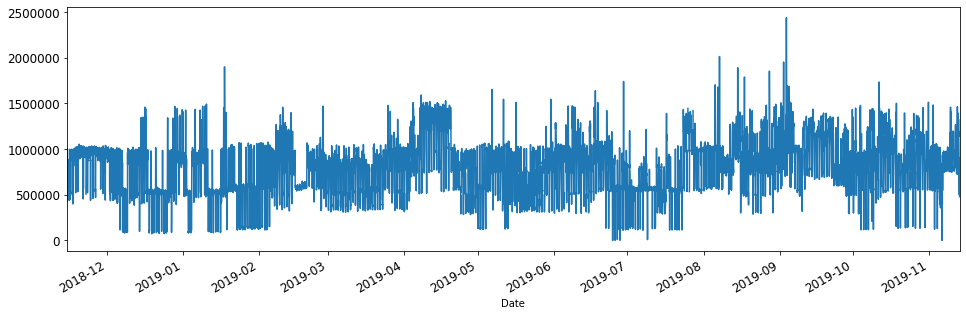

In [6]:
power['powera'].plot(figsize=(16,5), fontsize=12);

#### Power B Graph
One year with hourly data

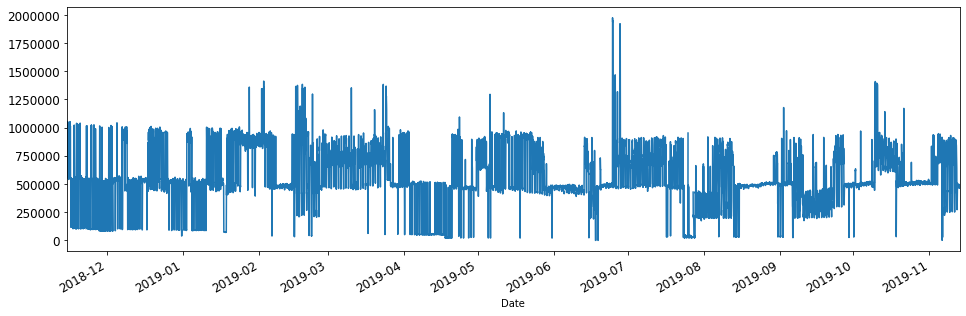

In [7]:
power['powerb'].plot(figsize=(16,5), fontsize=12);

#### Power A + Power B 
One year with hourly data

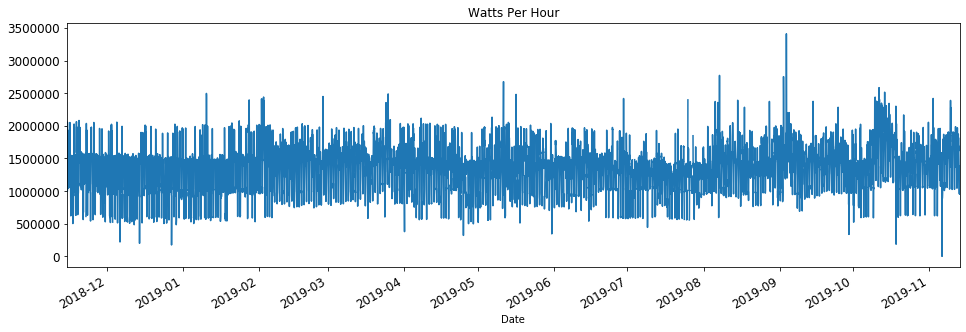

In [8]:
power['powertotal'].plot(figsize=(16,5), fontsize=12, title='Watts Per Hour');

#### Power Usage by hour

Can see a clear dip in power usage from 4-6 A.M. and a spike around 12 - 1 P.M. 

In [9]:
df_power = pd.DataFrame(index=power.index, columns= ('powertotal', 'Hour'))
df_power['powertotal'] = power['powertotal']
df_power['Hour'] = power['Hour']
df_power.index.freq = '1H'

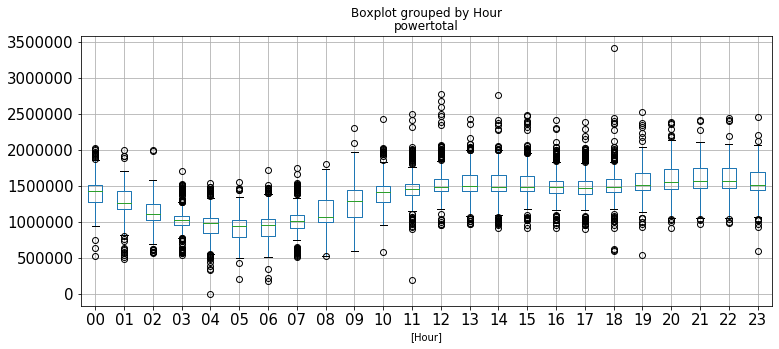

In [10]:
df_power.boxplot(by='Hour',figsize=(12,5), fontsize=15);

#### Average weekly power usage per week 

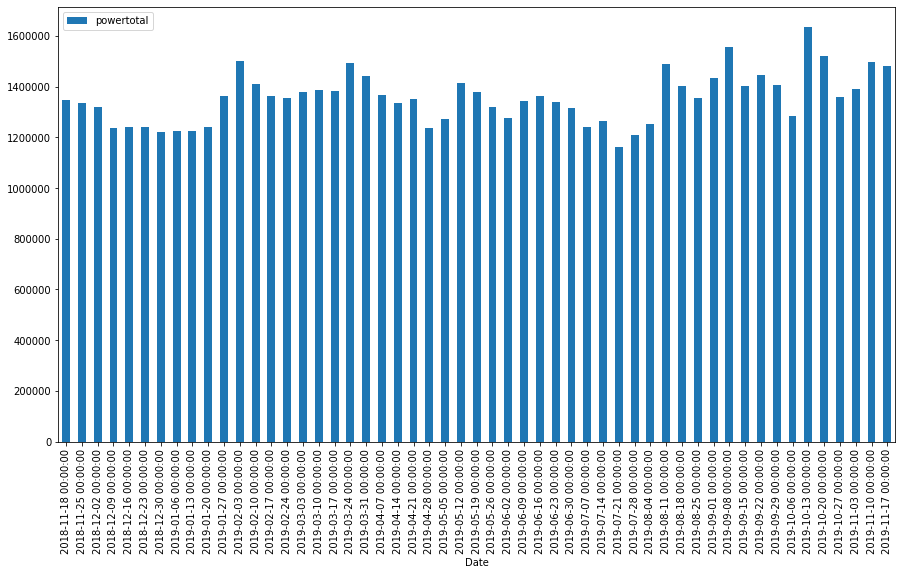

In [11]:
df_power.resample('W').mean().plot.bar(figsize=(15,8))

#### Summed Power usage per week 

A little bit of an uptrend, but not sure if it will be significant 

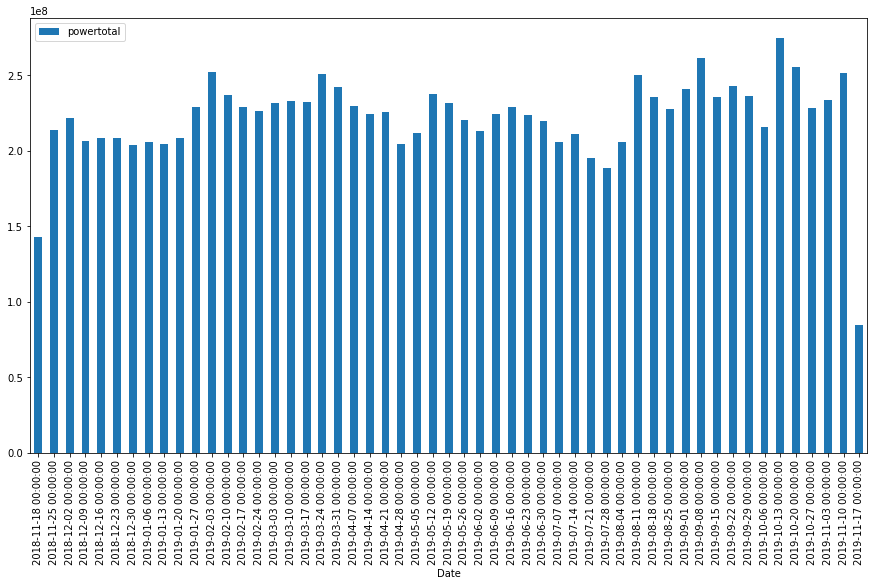

In [12]:
df_power.resample('W').sum().plot.bar(figsize=(15,8))

### Facebook Prophet Model

In [13]:
# Dataset 
df_pt = pd.read_csv('df_pt.csv')
df_pt.drop('Unnamed: 0', axis = 1, inplace=True)
df_pt['df'] = pd.to_datetime(df_pt['ds'])

In [14]:
# Building the model 
m = Prophet()

m.fit(df_pt)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [15]:
#Forecasting 2 days in the future creating future DF
# periods = 48 because the freq is 1H
future = m.make_future_dataframe(periods=48,freq = '1H')

In [16]:
# making predictions using the future DF 
forecast = m.predict(future)

In [17]:
# A look at the forecast DF
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-11-14 14:17:00,1.330990e+06,1.227307e+06,1.794770e+06,1.330990e+06,1.330990e+06,174094.159312,174094.159312,174094.159312,188708.987633,188708.987633,188708.987633,-14614.828321,-14614.828321,-14614.828321,0.0,0.0,0.0,1.505085e+06
1,2018-11-14 15:17:00,1.330867e+06,1.218984e+06,1.780929e+06,1.330867e+06,1.330867e+06,159069.199973,159069.199973,159069.199973,172843.252671,172843.252671,172843.252671,-13774.052698,-13774.052698,-13774.052698,0.0,0.0,0.0,1.489936e+06
2,2018-11-14 16:17:00,1.330744e+06,1.213757e+06,1.759157e+06,1.330744e+06,1.330744e+06,138848.920717,138848.920717,138848.920717,151758.520820,151758.520820,151758.520820,-12909.600103,-12909.600103,-12909.600103,0.0,0.0,0.0,1.469593e+06
3,2018-11-14 17:17:00,1.330621e+06,1.178246e+06,1.715243e+06,1.330621e+06,1.330621e+06,128997.992659,128997.992659,128997.992659,141027.239733,141027.239733,141027.239733,-12029.247073,-12029.247073,-12029.247073,0.0,0.0,0.0,1.459619e+06
4,2018-11-14 18:17:00,1.330497e+06,1.203574e+06,1.758732e+06,1.330497e+06,1.330497e+06,144580.437390,144580.437390,144580.437390,155721.115387,155721.115387,155721.115387,-11140.677997,-11140.677997,-11140.677997,0.0,0.0,0.0,1.475078e+06


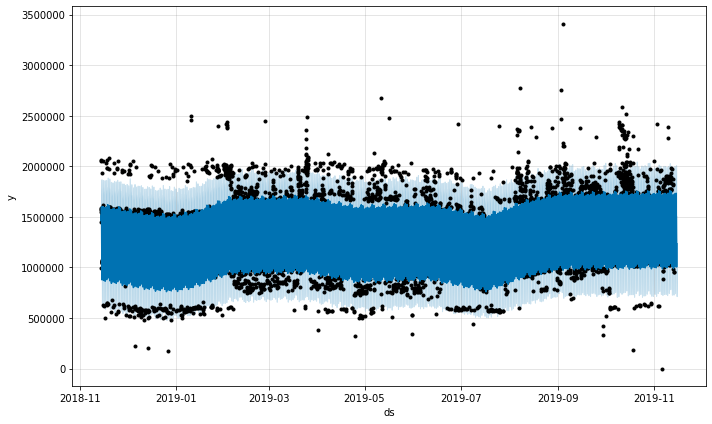

In [18]:
m.plot(forecast);

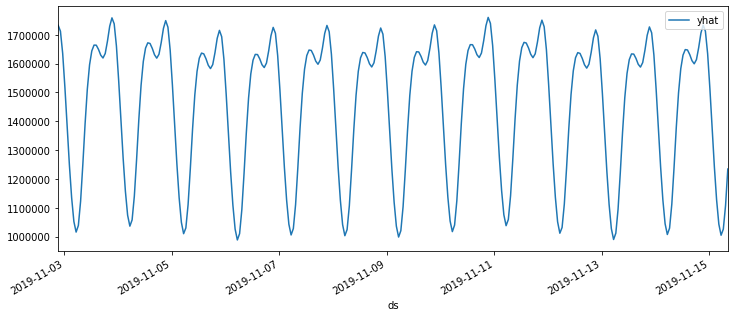

In [19]:
forecast[-300:].plot(x='ds', y='yhat', figsize=(12,5))

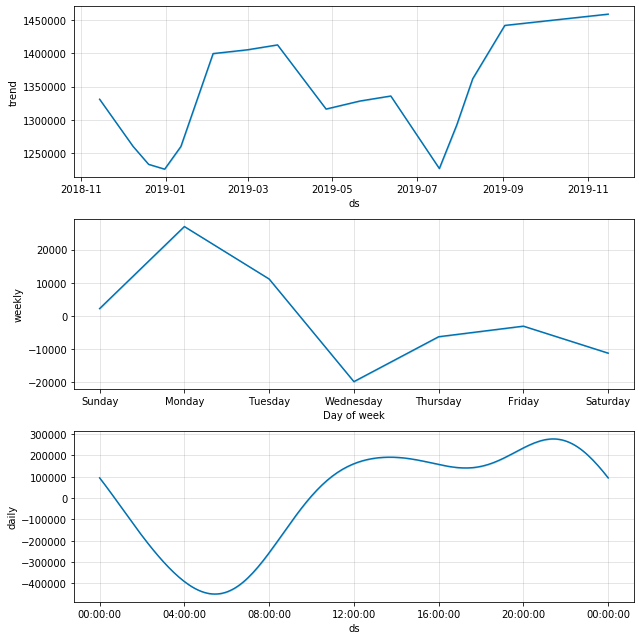

In [20]:
m.plot_components(forecast);

## Evaluating the Model 

In [ ]:
# df length 8731
train = df_pt.iloc[:8563]
test = df_pt.iloc[8563:]
test['ds'] = pd.to_datetime(test['ds'])
train['ds'] = pd.to_datetime(train['ds'])

In [23]:
# Training the Data and creating the predictions 
# Predicting 1 week into the future 
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=168,freq='1H')
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


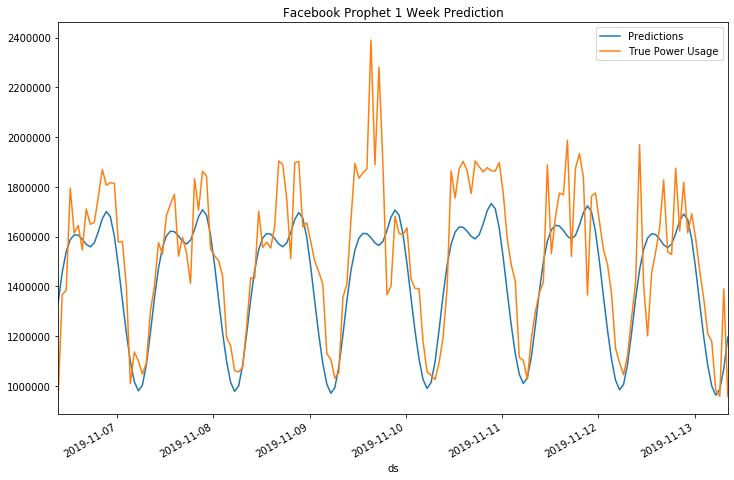

In [24]:
#Visualizing Test vs Prophet predictions
ax = forecast[-168:].plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8), title='Facebook Prophet 1 Week Prediction')
test.plot(x='ds',y='y',label='True Power Usage',legend=True,ax=ax)

#### The predictions on the above model get the seasonality pretty well.  Identifying two peaks at the top of each cycle, but it seems to miss the tops by quite a bit on each cycle. 

In [27]:
predictions = forecast.iloc[-168:]['yhat']
rmse(predictions,test['y'])
test.mean()

y    1.530921e+06
dtype: float64

In [28]:
# Initial 6 month training period
initial = 4368
initial = str(initial) + ' hours'
# Fold every 1 week
period = 168
period = str(period) + ' hours'
# Forecast 1 week into the future
horizon = 168
horizon = str(horizon) + ' hours'

In [29]:
df_cv = cross_validation(m, initial=initial, period=period, horizon = horizon)

INFO:fbprophet:Making 24 forecasts with cutoffs between 2019-05-22 08:17:00 and 2019-10-30 08:17:00


In [30]:
performance_metrics(df_cv).head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,coverage
0,17:00:00,5.052154e+10,224769.969913,167319.869635,0.802083
1,18:00:00,5.165671e+10,227281.122952,168497.377221,0.805000
2,19:00:00,5.209535e+10,228244.056536,168910.223435,0.802083
3,20:00:00,5.112954e+10,226118.431080,168127.611860,0.802917
4,21:00:00,4.608382e+10,214671.419635,162492.759591,0.814239


In [35]:
# Average RMSE which is displayed by the blue line in the chart below 
performance_metrics(df_cv)['rmse'].mean()

INFO:fbprophet:Skipping MAPE because y close to 0


224269.15652223484

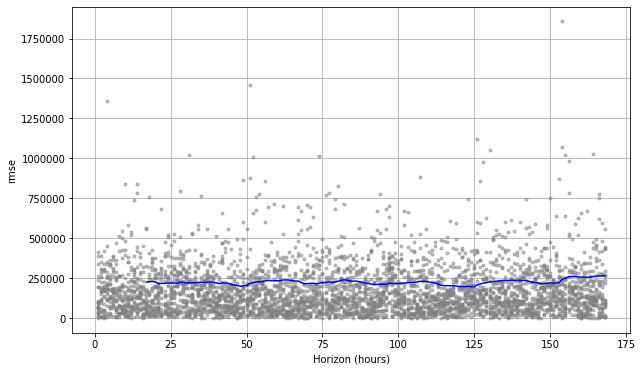

In [31]:
plot_cross_validation_metric(df_cv, metric='rmse');

### Using Cross validation the model predicts 168 periods into the future at multiple portions of the dataset.  The blue line is the mean RMSE at that point.  The model is underpredicting by about 224,000 on every cycle.